In [7]:
import os 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import scipy.io 
import librosa 
import librosa.display 
import wave
from glob import glob  #for reading files 
import glob 
import pickle as pk
import pickle
import csv 
import matplotlib.image as img
from skimage import io
import pandas as pd 
import matplotlib.pyplot as plt 
import torch
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from PIL import Image #load images in python and convert it to RGB format

### Path to the Data and walk through the sessions of each bird

In [3]:
"""
- set the path for the wav files within session within bird_folder
- append .wav names in data["path_spec"], 
         birdname   in data["bird_name"],
         path_file  in data["file_path"]
- Files are sorted correctly, if not then SORT THEM 1-10"""

path_bird = "/home/ahmedabdalsattar/Desktop/CNN_data/"

data = {"labels":[], 
        "spec_name":[], 
        "time_length":[],
       "file_path":[],
       "spec_path":[]}
# call files in sessions folder in files 
for i,(dirpath,dirnames,filenames) in enumerate(os.walk(path_bird)):
    # remove this random file that could appear within folder session  
    if dirpath is not path_bird:     
        basename = os.path.basename(dirpath)
        if basename == '.ipynb_checkpoints':
            pass 
        else:
            dirpath_comp = dirpath.split("/")
            
        for f in filenames:
            file_path = os.path.join(dirpath,f)
            base = os.path.basename(file_path)
            if base.endswith('.wav'):
                # append files names, and path of wav file in the hash dictionary 
                data["spec_name"].append(base)
                data["file_path"].append(file_path)
            else:
                pass

In [6]:
"""
- create a sampling frequency for each file
- find time length of each file and append it in data[time_length]
- create images.PNG and save them in spec_img folder"""

# notes 
"""1- Make Sure Data are not duplicated in the folder in case you run the code multiple times for the same dataset
   2- sample rate and how much time need to take from each file (one second or avg or more or less)depend on boutes"""


path_img = "/home/ahmedabdalsattar/Desktop/Birdsong_PyTorch/spec_img/"

sampling_freq = 44100 # use 48000 for signal 
# to use the default for sampling_fre use NONE in sr 
n_fft = 1024
hop_length = 256


for g in range(len(data["spec_name"])):
    signal,sr = librosa.load(data["file_path"][g],sr=sampling_freq)
    time_period = librosa.get_duration(signal,sr=sampling_freq)
    signal,sr = librosa.load(data["file_path"][g],sr=sampling_freq,duration=1)

#     plt.figure(figsize=(7,7))
#     spec = librosa.feature.melspectrogram(signal,sr=sampling_freq,n_fft=n_fft,hop_length=hop_length)
#     spec_db = librosa.power_to_db(spec,ref=np.max)
#     librosa.display.specshow(spec_db,hop_length=hop_length)
    
    file_name = os.path.splitext(data["file_path"][g])
    file_name = file_name[-2]
    name_img = os.path.basename(file_name)
#     plt.savefig(os.path.join(path_img , "{spe}".format(spe = name_img) + ".png"))
#     append spectrogram path, and time length in the hash dictionary 
    data["spec_path"].append(name_img+".png")
    data["time_length"].append(time_period)
    
    

KeyboardInterrupt: 

Text(0, 0.5, 'Frequency')

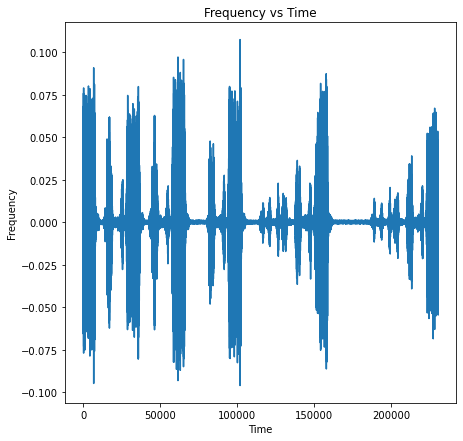

In [8]:
# Display example of audio as Frequency vs Time 
# set the path example of any wav file in the data 
path_bird = "/home/ahmedabdalsattar/Desktop/CNN_data/z_m10g8_20_test/2021-02-15/2021-02-15_POI0.wav"
signal,sr = librosa.load(path_bird,sr=sampling_freq)
plt.figure(figsize=(7,7))
plt.plot(signal)
plt.title("Frequency vs Time")
plt.xlabel("Time")
plt.ylabel("Frequency")


### Export Data into CSV file 

In [ ]:

# path_csv_file = '/home/ahmedabdalsattar/Desktop/Birdsong_PyTorch/CSV_files/'

# bird_name = []
# # def data_csv_file(path_csv_file):

# with open(os.path.join(path_csv_file,'data_file.csv'),'w',newline='') as file:
#     fieldnames = ["spec_name","labels","wav_name","length_time","path_file"]
#     writer = csv.DictWriter(file,fieldnames=fieldnames)
#     writer.writeheader()
# with open(os.path.join(path_csv_file,'data_file.csv'),'a',newline='')as file:
#     writer = csv.writer(file)
#     for i in range(1,len(data["time_length"])):
#         writer = csv.DictWriter(file,fieldnames=fieldnames)
#         writer.writerow({'wav_name':data["spec_name"][i], 'spec_name':data["spec_path"][i],'path_file':data["file_path"][i],'length_time':data["time_length"][i]})



### Call .csv file (data) and turn to DataFrame 

In [83]:
# display dataframe table that shows all data, and print size and shape of data 
path_csv_file = '/home/ahmedabdalsattar/Desktop/Birdsong_PyTorch/CSV_files/data_file_labeled.csv'
dataframe = pd.read_csv(path_csv_file)
print('Total size' , dataframe.size)
print('Shape of data' ,dataframe.shape)
dataframe 

Total size 3196
Shape of data (799, 4)


,img_name,labels,length_time,path_spect
0,2021-02-15_POI1.wav,1,2.997733,/home/ahmedabdalsattar/Desktop/CNN_data/z_m10g...
1,2021-02-15_POI2.wav,1,2.477867,/home/ahmedabdalsattar/Desktop/CNN_data/z_m10g...
2,2021-02-15_POI3.wav,1,0.791467,/home/ahmedabdalsattar/Desktop/CNN_data/z_m10g...
3,2021-02-15_POI4.wav,1,1.517867,/home/ahmedabdalsattar/Desktop/CNN_data/z_m10g...
4,2021-02-15_POI5.wav,1,2.230133,/home/ahmedabdalsattar/Desktop/CNN_data/z_m10g...
...,...,...,...,...
794,2020-10-12_POI95.wav,2,1.279333,/home/ahmedabdalsattar/Desktop/CNN_data/z_y5k3...
795,2020-10-12_POI96.wav,1,1.126200,/home/ahmedabdalsattar/Desktop/CNN_data/z_y5k3...
796,2020-10-12_POI97.wav,1,1.210600,/home/ahmedabdalsattar/Desktop/CNN_data/z_y5k3...
797,2020-10-12_POI98.wav,1,1.817533,/home/ahmedabdalsattar/Desktop/CNN_data/z_y5k3...


### Display Data to confirm data balance 

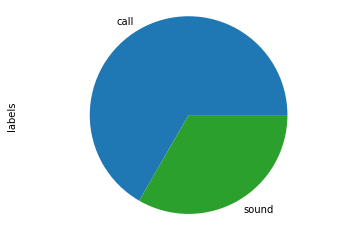

,spec_name,wav_name,length_time,path_file
labels,,,,
0.0,29,29,29,29
1.0,431,431,431,431
2.0,338,338,338,338


In [11]:
"""check out the data if its balanced to have equal number of classes (noise,sound,calls)"""
import pandas as pd
from matplotlib.pyplot import pie, axis, show
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({'label': ['noise', 'sound', 'call'], 'labels': [0, 1, 2]})
df.labels.groupby(df.label).sum().plot(kind='pie')
plt.axis('equal')
plt.show()


count = dataframe.groupby(['labels']).count() 
count

### Plot Spectrogram from first, middle, and last of the dataframe (before normalizing)

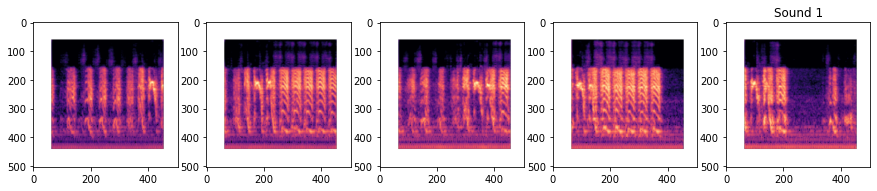

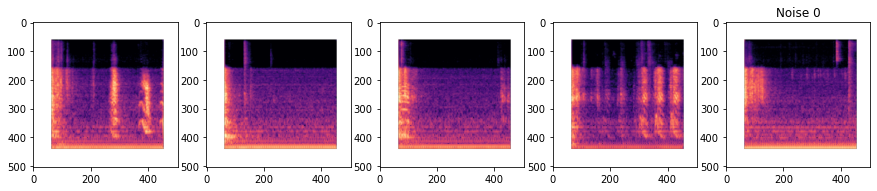

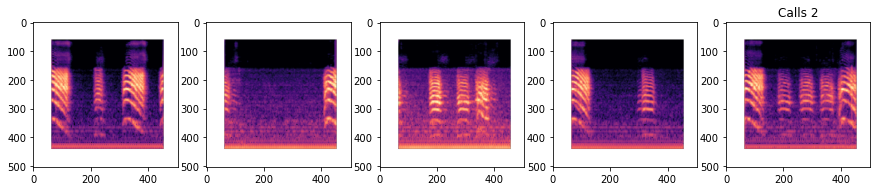

In [12]:
"""display example of images that shows Sound(row1),noise(row2),calls(row3)"""

spectrom_path = '/home/ahmedabdalsattar/Desktop/Birdsong_PyTorch/spec_img/'

import matplotlib.image as img
fig,ax = plt.subplots(1,5,figsize = (15,3))

for i,idx in enumerate(dataframe[dataframe['labels'] == 1]['spec_name'][-5:]):
    path_spec = spectrom_path + idx
    ax[i].imshow(img.imread(path_spec))
    plt.title('Sound 1')

    
fig,ax = plt.subplots(1,5,figsize = (15,3))
for i,idx in enumerate(dataframe[dataframe['labels'] == 0]['spec_name'][:5]):
    path_spec = spectrom_path + idx
    ax[i].imshow(img.imread(path_spec))
    plt.title('Noise 0')

    
fig,ax = plt.subplots(1,5,figsize = (15,3))
for i,idx in enumerate(dataframe[dataframe['labels'] == 2]['spec_name'][:5]):
    path_spec = spectrom_path + idx
    ax[i].imshow(img.imread(path_spec))
    plt.title('Calls 2')



### Split dataframe train, and valid data for training 

In [13]:

#Create a cross validation with multiple folds to make 4 different accuracy 
# shuffle the data randomly using the index from the training and valid/testing data 

# train, valid_data = train_test_split(dataframe, test_size=0.2)

### Function that split data into train and test set 

In [14]:
"""
- in this function, we need to split the dataframe into train and valid data. 
- the splitting need to be randomly and for multiple times to create multiple accuracy results. 
"""

# read data from .csv file 
path_csv = '/home/ahmedabdalsattar/Desktop/Birdsong_PyTorch/CSV_files/data_file-1.csv'
data = pd.read_csv(path_csv)

# split the data into train and test sets to save each of them in a .csv file 
path_dir = "/home/ahmedabdalsattar/Desktop/Birdsong_PyTorch/CSV_files"
def split_data(data,path_dir):
    train_data, test_data = train_test_split(data,test_size=0.2,random_state=1)
    if not os.path.exists(path_dir):
        os.makedirs(path_dir)
    return train_data,test_data

# train-set and test-set in a dataframe 
train_data = split_data(data,path_dir)[0]
test_data = split_data(data,path_dir)[1]


### Save train and test data in two different .csv files and read it for observation 

In [15]:
# save train and test set in a .csv_files (train_data.csv,test_data.csv)
train_x = train_data.to_csv(r'/home/ahmedabdalsattar/Desktop/Birdsong_PyTorch/CSV_files/train_data.csv',index=False)
test_x = test_data.to_csv(r'/home/ahmedabdalsattar/Desktop/Birdsong_PyTorch/CSV_files/test_data.csv',index=False)

#read data in .csv files for observation 
path_train = '/home/ahmedabdalsattar/Desktop/Birdsong_PyTorch/CSV_files/train_data.csv'
path_test = '/home/ahmedabdalsattar/Desktop/Birdsong_PyTorch/CSV_files/test_data.csv'
df_train = pd.read_csv(path_train)
df_test = pd.read_csv(path_test)

### convert dataframe .csv files into .pkl files 

In [16]:
# .pkl_files (train_set,test_set)
path_train_pkl = "/home/ahmedabdalsattar/Desktop/Birdsong_PyTorch/CSV_files/train_pickle.pkl"
path_test_pkl = "/home/ahmedabdalsattar/Desktop/Birdsong_PyTorch/CSV_files/test_pickle.pkl"

def save_pkl(path_pkl,data):
    with open (path_pkl,'wb') as file1:
        pickle.dump(data,file1)

#call the funtion to save as .pkl files
save_pkl(path_train_pkl,train_data)
save_pkl(path_test_pkl,test_data)

#read .pkl files 
pickle_1 = open(path_train_pkl,"rb")
pickle_2 = open(path_test_pkl,"rb")

#load data for observation 
read_pkl1 = pickle.load(pickle_1)
read_pkl2 = pickle.load(pickle_2)


### Use transform class from PyTorch to Normilize (train/test) data 

In [17]:
"""
- transform dataframe data from numpy array to Tensor
- normalize data: find mean and std (mean and std depend on # of channels, 3 channels => 3 mean, 3std vectors),
find mean and std and plug it in the mean and std parameters.
"""
train_transform = torchvision.transforms.Compose([
    torchvision.transforms.Scale((128,128)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(
        mean=[0.1989, 0.5048, 0.5863],
        std=[0.6917, 0.5318, 0.5058],
    ),
])

test_transform = torchvision.transforms.Compose([
    torchvision.transforms.Scale((128,128)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(
        mean=[0.1989, 0.5048, 0.5863],
        std=[0.6917, 0.5318, 0.5058],
    ),
])


/opt/conda/lib/python3.8/site-packages/torchvision/transforms/transforms.py:256: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


### Dataset Class 

In [18]:
"""
- Dataset class contain function that read data files, and return data images, labels length of data 
- read from index of dataframe, open images, convert it into RGB, set the location of images and labels 
- getitem return data as tensors and len__function return data length 
"""

class spec_song(Dataset):
    #init is initilizer 
    def __init__(self,root_dir, annotations,transform=None):
        self.root_dir = root_dir
        self.annotations = pd.read_pickle(annotations)
        self.transform = transform
    def __len__(self):
        return len(self.annotations)
    def __getitem__(self,index):
        img_id = self.annotations.iloc[index,0]
        img = Image.open(os.path.join(self.root_dir,img_id)).convert("RGB")
        y_label = torch.tensor(float(self.annotations.iloc[index,1]))
        if self.transform is not None:
            img = self.transform(img)
        return img,y_label #return image and label tuple 

path_img = "/home/ahmedabdalsattar/Desktop/Birdsong_PyTorch/spec_img/"
path_test_pkl = "/home/ahmedabdalsattar/Desktop/Birdsong_PyTorch/CSV_files/test_pickle.pkl"

# call the class and both functions to display dataset of the test data 
a = spec_song(annotations=path_test_pkl,root_dir=path_img,transform=test_transform)
print(a.__getitem__(159))
print(a.__len__())


(tensor([[[1.1582, 1.1582, 1.1582,  ..., 1.1582, 1.1582, 1.1582],
         [1.1582, 1.1582, 1.1582,  ..., 1.1582, 1.1582, 1.1582],
         [1.1582, 1.1582, 1.1582,  ..., 1.1582, 1.1582, 1.1582],
         ...,
         [1.1582, 1.1582, 1.1582,  ..., 1.1582, 1.1582, 1.1582],
         [1.1582, 1.1582, 1.1582,  ..., 1.1582, 1.1582, 1.1582],
         [1.1582, 1.1582, 1.1582,  ..., 1.1582, 1.1582, 1.1582]],

        [[0.9312, 0.9312, 0.9312,  ..., 0.9312, 0.9312, 0.9312],
         [0.9312, 0.9312, 0.9312,  ..., 0.9312, 0.9312, 0.9312],
         [0.9312, 0.9312, 0.9312,  ..., 0.9312, 0.9312, 0.9312],
         ...,
         [0.9312, 0.9312, 0.9312,  ..., 0.9312, 0.9312, 0.9312],
         [0.9312, 0.9312, 0.9312,  ..., 0.9312, 0.9312, 0.9312],
         [0.9312, 0.9312, 0.9312,  ..., 0.9312, 0.9312, 0.9312]],

        [[0.8179, 0.8179, 0.8179,  ..., 0.8179, 0.8179, 0.8179],
         [0.8179, 0.8179, 0.8179,  ..., 0.8179, 0.8179, 0.8179],
         [0.8179, 0.8179, 0.8179,  ..., 0.8179, 0.8179, 0

### Dataset

In [19]:
"""Dataset"""
#call spec_song classs and implement transform class normalize the data. 
train_data = spec_song(annotations=path_train_pkl,root_dir=path_img,transform=train_transform)
test_data = spec_song(annotations=path_test_pkl,root_dir=path_img,transform=test_transform)

### Hyperparameters 

In [20]:
input_size = 504 * 504
num_epochs = 10
num_classes = 3
batch_size = 20
learning_rate = 0.001

### DataLoader

In [21]:

"""DataLoader supports automatically collatingindividual fetched data samples into 
batches via arguments"""

train_loader = DataLoader(dataset = train_data, batch_size = batch_size, shuffle=True, num_workers=0)
test_loader = DataLoader(dataset = test_data,batch_size = batch_size, shuffle=False,num_workers=0)

### Find Mean and STD for all 3 channels of images 

In [ ]:
# """Two ways to find the mean and std for normalization using z-score 
# 1- easy way: load dataset using Pytorch DataLoader class and get a single 
# batch tensor that include all train_data or test_data
# (set the batch_size = len(train_data) train one time)
# *** it may not work with large data"""


# def norm_data(train_test_data):
#     loader = DataLoader(train_data,batch_size=len(train_test_data),num_workers=1)
#     data_l = next(iter(loader))
#     # data_l[index= 0 is the data and index =1 is the labels][index= # channels(0,1,2)] ]
#     channel1 = data_l[0][0][0].mean(),data_l[0][0][0].std()
#     channel2 = data_l[0][1][1].mean(),data_l[0][1][1].std()
#     channel3 = data_l[0][2][2].mean(),data_l[0][2][2].std()
#     return channel1,channel2,channel3

# norm_data(train_data)
# # norm_data(test_data)

### Plot distribution of pixels of image before normalizing 

In [ ]:

# from PIL import Image
# image_path = "/home/ahmedabdalsattar/Desktop/Birdsong_PyTorch/spec_img/2021-02-18_POI1.png"
# image = Image.open(image_path)

# plt.hist(np.array(image).ravel(), bins=50, density=True);
# plt.xlabel("pixel values")
# plt.ylabel("relative frequency")
# plt.title("distribution of pixels");

### plot distribution of pixels of image after finding normilizing using z-score method and PyTorch 

size image [3, 504, 504]


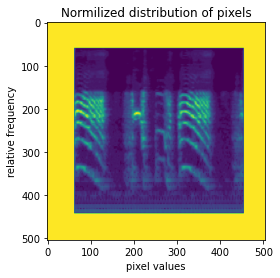

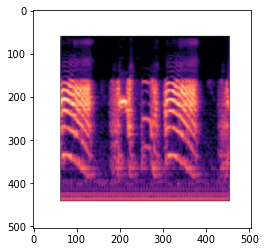

In [22]:

image_path = "/home/ahmedabdalsattar/Desktop/Birdsong_PyTorch/spec_img/2021-02-18_POI2.png"
image = Image.open(image_path).convert('RGB')

# mean and std is been calculated using PyTo
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(
        mean=[0.1989, 0.5048, 0.5863],
        std=[0.6917, 0.5318, 0.5058],
    ),
])

#resize the images eg.128x128 to reduce the number of input features 

image_trans = transform(image)

# plt.hist(np.array(image_trans).ravel(), bins=50, density=True);
plt.xlabel("pixel values")
plt.ylabel("relative frequency")
plt.title("Normilized distribution of pixels")
#create a line that shows the mean in the histogram. 
# plt.axvline(image_trans.mean())

print('size image',list(image_trans.size()))


#plt.imshow(np.array(image_trans))
plt.figure(1)
plt.imshow(image_trans[1])

plt.figure(2)
plt.imshow(image)

### 2nd way of finding mean and std 

In [ ]:

# """
# 2- Hard_Way: manually implement mean and std and train over multiple batches 

# this code below is for train_data and one channel only. since RGB we have to do it for 
# three color channels. 
# """

# loader  = DataLoader(train_data, batch_size=50,num_workers=1)
# #calc n value (total number of pixels inside our dataset): len(data) * H_img * W_img
# num_of_pixels = len(train_data) * 504 * 504 

# #sum pixels by iterating over each batch and calc mean by dividing sum/total_num_pixels
# total_sum = 0
# for batch in loader:
#     # below will give us total sum of all pixels inside dataset 
#     total_sum += batch[0].sum()
#     mean = total_sum/num_of_pixels 


# # calc sum of squared errors by iterating thorough each batch 
# # calc std by dividing sum of squared errors by the total num_pixls and square root the resule 

# sum_of_squared_error = 0
# for batch in loader: 
#     sum_of_squared_error += ((batch[0] - mean).pow(2)).sum()
# std = torch.sqrt(sum_of_squared_error / num_of_pixels)
    
# mean,std 

### 3d way of finding Mean and Std for three channels image 

In [ ]:
# """this is a function that rearange the array of [B,C,W,H] and find the meana and std"""

# import torch
# from torch.utils.data import TensorDataset, DataLoader


# loader = DataLoader(train_data, batch_size=50)

# nimages = 0
# mean = 0.
# std = 0.
# for batch, _ in loader:
#     # Rearrange batch to be the shape of [B, C, W * H]
#     batch = batch.view(batch.size(0), batch.size(1), -1)
#     # Update total number of images
#     nimages += batch.size(0)
#     # Compute mean and std here
#     mean += batch.mean(2).sum(0) 
#     std += batch.std(2).sum(0)

# # Final step
# mean /= nimages
# std /= nimages

# print('   mean = ' , mean)
# print('standatd_dev = ',std)

### Display Batch of DataLoader

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


image_shape=  torch.Size([20, 3, 128, 128]) 
 labels_shape= torch.Size([20])


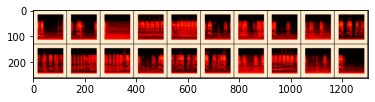

In [23]:

def imshow(img):
    img = img
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()


"""both labels and images are tensors"""
print("image_shape= ", images.shape,'\n',"labels_shape=",labels.shape)

# show images
# 2 padding (default)
imshow(torchvision.utils.make_grid(images,10))


### Check for GPU, otherwise CPU 

In [29]:
# for PyTorch, it is better to use GPU, especially when it comes to parallel processing like CNN 

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

### Display Images with its label of a Batch 

In [24]:

"""trainimages, trainlabels are the images with its labels in a batch (50 image each batch)"""

trainimages, trainlabels = next(iter(train_loader))
print('vector shows: [#images_each batch, #channel,heigh_img,width_img] = ',trainimages.size())

def disp_img_batch(trainimages):
    for i in range(len(trainimages)):
        #display the label for each image 
        print('label = ', trainlabels[i])
        # show images with on channel 
        plt.imshow(trainimages[i][1],interpolation = 'nearest')
        plt.show()
# # Run the Function         
# disp_img_batch(trainimages)



vector shows: [#images_each batch, #channel,heigh_img,width_img] =  torch.Size([20, 3, 128, 128])


### Apply CNN 

In [25]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module): 
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=5,padding=1)
        self.conv2 = nn.Conv2d(in_channels = 32, out_channels =16, kernel_size=5,padding=1)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(in_features = 14400, out_features = 120)
        self.fc2 = nn.Linear(in_features =120,out_features = 3)
        
#self.out = nn.Linear(in_features =,out_features =)
    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(x.shape[0],-1)
#         print(x.shape)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return x
    


# for name, param in model.named_parameters():
#     print(name,'t\t',param.shape)

In [26]:
"""display CNN class for the Network"""
model = CNN()
print(model)

CNN(
  (conv1): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 16, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  (conv2_drop): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=14400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=3, bias=True)
)


In [ ]:

"""
- class weight inside function conv1 which inside class model = CNN()
- 

below are the weights inside the conv1 layer
- notice 'Parameter Containing': it is special tensor because its values 
are learnable parameters for network, meaning the below values are learned 
as the Network is trained
- as we train, these weight values are updated in such a way that the loss 
function is minimized 
- """
# model.conv1.weight

In [ ]:
"""to keep track of all weight tensors inside the netowrk,Pytorch class called 
Parameter """

In [ ]:
"""
[#num_filter, depth_of_each_filter(inputchannels),H_filter,W_filter]"""
# model.conv1.weight.shape
# [#num_filter, depth_of_each_filter(inputchannels),H_filter,W_filter]
# rank4 tensor 
# model.conv2.weight.shape 
# model.fc1.weight.shape
# model.fc2.weight.shape
# # we can pull any single filter out by indexing into weight tensor first axis 
# model.conv1.weight[0].shape

# # torch.size([input_height,output_width]) rank2 tensor 
# # heights = out_features and width = in_features
# model.fc1.weight.shape
# model.fc2.weight.shape

In [27]:
"""
getting all the learnable parameters of our weights 
including the bias as a learnable parameter for each layer 
- each layer has a weight tensor and a bias tensor 
"""

for name, param in model.named_parameters():
    print(name,'t\t',param.shape)

conv1.weight t	 torch.Size([32, 3, 5, 5])
conv1.bias t	 torch.Size([32])
conv2.weight t	 torch.Size([16, 32, 5, 5])
conv2.bias t	 torch.Size([16])
fc1.weight t	 torch.Size([120, 14400])
fc1.bias t	 torch.Size([120])
fc2.weight t	 torch.Size([3, 120])
fc2.bias t	 torch.Size([3])


In [ ]:
# model = CNN()
# print(model)
# device = ("cuda" if torch.cuda.is_available() else "cpu")
# model = CNN().to(device)
# criterion = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(model.parameters(),lr = learning_rate)

In [ ]:
import IPython as ip 

In [30]:

model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = learning_rate)

In [31]:

# keeping-track-of-losses 
train_losses = []
valid_losses = []

for epoch in range(1, num_epochs + 1):
    # keep-track-of-training-and-validation-loss
    train_loss = 0.0
    valid_loss = 0.0
    
    # training-the-model
    model.train()
    for data, target in train_loader:
        # move-tensors-to-GPU 
        data = data.to(device)
        target = target.to(device)
#         ip.embed()   
        #clear-the-gradients-of-all-optimized-variables
        optimizer.zero_grad()
        
# Forward + Backward + Optimizer 

        #forward-pass: compute-predicted-outputs-by-passing-inputs-to-the-model
        output = model(data)
        #calculate-the-batch-loss
        loss = criterion(output, target.long())
        #backward-pass: compute-gradient-of-the-loss-wrt-model-parameters
        loss.backward()
        #perform-a-ingle-optimization-step (parameter-update)
        optimizer.step()
        
        # combine the loss in minibatch 
        train_loss = loss.data.item()/len(train_loader.sampler)    

        
#     validate-the-model
    model.eval()
    for data, target in test_loader:
        
        data = data.to(device)
        target = target.to(device)
        
        output = model(data)
        
        loss = criterion(output, target.long())
        
#         update-average-validation-loss 
        valid_loss += loss.item() * data.size(0)
    
    # ip command used for debuggin the code 
#     ip.embed() 
    
#     valid_loss = valid_loss/len(valid_loader.sampler)
        valid_loss = loss.data.item()/len(test_loader.sampler)    

    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
        
#     print-training/validation-statistics 
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))


Epoch: 1 	Training Loss: 0.001122 	Validation Loss: 0.004430
Epoch: 2 	Training Loss: 0.001432 	Validation Loss: 0.003731
Epoch: 3 	Training Loss: 0.000682 	Validation Loss: 0.004188
Epoch: 4 	Training Loss: 0.000796 	Validation Loss: 0.003192
Epoch: 5 	Training Loss: 0.000558 	Validation Loss: 0.003261
Epoch: 6 	Training Loss: 0.000342 	Validation Loss: 0.003169
Epoch: 7 	Training Loss: 0.000323 	Validation Loss: 0.002825
Epoch: 8 	Training Loss: 0.000465 	Validation Loss: 0.002432
Epoch: 9 	Training Loss: 0.000833 	Validation Loss: 0.002277
Epoch: 10 	Training Loss: 0.000409 	Validation Loss: 0.001825


In [51]:
loss

tensor(0.2921, device='cuda:0', grad_fn=<NllLossBackward>)

In [74]:
# test-the-model
model.eval()  # it-disables-dropout
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        index = output.data.cpu().numpy().argmax()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
          
    print('Test Accuracy of the model: {} %'.format(100 * correct / total))

# Save 
torch.save(model.state_dict(), 'model.ckpt')

Test Accuracy of the model: 91.25 %


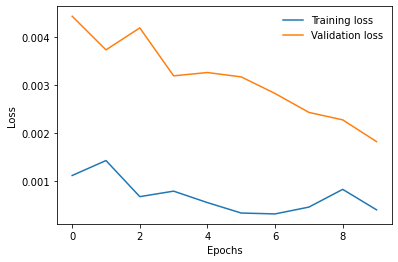

In [35]:
# %matplotlib inline
# %config InlineBackend.figure_format = 'retina'

plt.plot(train_losses, label='Training loss')
plt.plot(valid_losses, label='Validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(frameon=False)

In [66]:
"""Predicted Images"""
def predict_image(image):
    image_tensor = test_transforms(image).float()
    image_tensor = image_tensor.unsqueeze_(0)
    input = Variable(image_tensor)
    input = input.to(device)
    output = model(input)
    index = output.data.cpu().numpy().argmax()
    return index


def get_random_images(num):
    data = datasets.ImageFolder(data_dir, transform=test_transforms)
    classes = data.classes
    indices = list(range(len(data)))
    np.random.shuffle(indices)
    idx = indices[:num]
    from torch.utils.data.sampler import SubsetRandomSampler
    sampler = SubsetRandomSampler(idx)
    loader = torch.utils.data.DataLoader(data, 
                   sampler=sampler, batch_size=num)
    dataiter = iter(loader)
    images, labels = dataiter.next()
    return images, labels

to_pil = transforms.ToPILImage()
images, labels = get_random_images(5)
fig=plt.figure(figsize=(10,10))
for ii in range(len(images)):
    image = to_pil(images[ii])
    index = predict_image(image)
    sub = fig.add_subplot(1, len(images), ii+1)
    res = int(labels[ii]) == index
    sub.set_title(str(classes[index]) + ":" + str(res))
    plt.axis('off')
    plt.imshow(image)
plt.show()

NameError: name 'datasets' is not defined

In [ ]:
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        # labels CrossEntropyLoss expects targets to be class indices,
        #and hence Long Tensors, but you gave it a Float Tensor.
        labels = labels.to(device=device, dtype=torch.int64)
        # squeeze the dimensions to labels.squeez(1)
#         labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 2000 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

print('Finished Training')
# PATH = ''
# torch.save(model.state_dict(), PATH)

# with torch.no_grad():
#     n_correct = 0
#     n_samples = 0
#     n_class_correct = [0 for i in range(10)]
#     n_class_samples = [0 for i in range(10)]
#     for images, labels in test_loader:
#         images = images.to(device)
#         labels = labels.to(device)
#         outputs = model(images)
#         # max returns (value ,index)
#         _, predicted = torch.max(outputs, 1)
#         n_samples += labels.size(0)
#         n_correct += (predicted == labels).sum().item()
        
#         for i in range(batch_size):
#             label = labels[i]
#             pred = predicted[i]
#             if (label == pred):
#                 n_class_correct[label] += 1
#             n_class_samples[label] += 1

#     acc = 100.0 * n_correct / n_samples
#     print(f'Accuracy of the network: {acc} %')

#     for i in range(10):
#         acc = 100.0 * n_class_correct[i] / n_class_samples[i]
#         print(f'Accuracy of {classes[i]}: {acc} %')

In [ ]:
# # keeping-track-of-losses 
# train_losses = []
# valid_losses = []

# for epoch in range(1, num_epochs + 1):
#     # keep-track-of-training-and-validation-loss
#     train_loss = 0.0
#     valid_loss = 0.0
    
#     # training-the-model
#     model.train()
#     for data, target in train_loader:
#         # move-tensors-to-GPU 
#         data = data.to(device)
#         target = target.to(device)
#         # clear-the-gradients-of-all-optimized-variables
#         optimizer.zero_grad()
#         # forward-pass: compute-predicted-outputs-by-passing-inputs-to-the-model
#         output = model(data)
#         # calculate-the-batch-loss
#         loss = criterion(output, target)
# # backward-pass: compute-gradient-of-the-loss-wrt-model-parameters
#         loss.backward()
#         # perform-a-ingle-optimization-step (parameter-update)
#         optimizer.step()
#         # update-training-loss
#         train_loss += loss.item() * data.size(0)
        
#     # validate-the-model
#     model.eval()
#     for data, target in test_loader:
        
#         data = data.to(device)
#         target = target.to(device)
        
#         output = model(data)
        
#         loss = criterion(output, target)
        
#         # update-average-validation-loss 
#         valid_loss += loss.item() * data.size(0)
    
#     calculate-average-losses
#     train_loss = train_loss/len(train_loader.sampler)
#     valid_loss = valid_loss/len(test_loader.sampler)
#     train_losses.append(train_loss)
#     valid_losses.append(valid_loss)
# # print-training/validation-statistics 
#     print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(epoch, train_loss))